Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)

2021/11/04

<img align="left" width="50%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" >

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv("OAICC_20211012.csv")

In [74]:
df

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country,Year
0,"Ahnelt, H., Schade, F. M., & Wegner, M., 2016....",doi:10.1111/jfd.12417,NaN,Not included,< 2 carbonate chemistry parameters,EU-Austria,2016
1,"Ahrendt, S., Mobberley, J., Visscher, P., Koss...",doi:10.3390/min4010145,NaN,Not included,< 2 carbonate chemistry parameters,USA,2014
2,"Aires, T., Serebryakova, A., Viard, F., Serrão...",doi:10.7717/peerj.4377,NaN,Not included,< 2 carbonate chemistry parameters,EU-Portugal,2018
3,"Al-Awlaqi, N. A. N., Shazili, N. A. M., & Yuso...",doi:10.17576/mjas-2019-2306-10,NaN,Not included,< 2 carbonate chemistry parameters,Malaysia,2019
4,"Al-Janabi, B., Kruse, I., Graiff, A., Winde, V...",doi:10.1371/journal.pone.0152948,NaN,Not included,< 2 carbonate chemistry parameters,EU-Germany,2016
...,...,...,...,...,...,...,...
2744,"Zittier, Z. M. C., Hirse, T., & Pörtner, H.-O....",doi:10.1007/s00227-012-2073-8,10.1594/PANGAEA.821402,Included,NaN,EU-Germany,2013
2745,"Ziveri, P., Passaro, M., Incarbona, A., Milazz...",doi:10.1086/BBLv226n3p282,10.1594/PANGAEA.838830,Included,NaN,EU-Spain,2014
2746,"Zlatkin, R. L., & Heuer, R. M., 2019. Ocean ac...",doi:10.1098/rsos.191041,10.1594/PANGAEA.912287,Included,NaN,USA,2019
2747,"Zondervan, I., Rost, B., & Riebesell, U., 2002...",doi:10.1016/S0022-0981(02)00037-0,10.1594/PANGAEA.726883,Included,NaN,EU-Germany,2002


In [75]:
a = df.groupby("Country").size()
a.sort_values(inplace=True, ascending=False)
b = a[a > 10]
b

Country
USA                   573
Australia             317
China                 308
EU-Germany            278
EU-UK                 206
EU-Portugal            99
EU-Spain               92
EU-Italy               91
Japan                  85
EU-France              82
Canada                 59
New Zealand            56
EU-Sweden              55
EU-Norway              51
Chile                  49
South Korea            34
Brazil                 29
EU-Monaco              25
Israel                 24
India                  23
EU-Belgium             23
EU-The Netherlands     22
EU-Greece              15
EU-Finland             13
Malaysia               11
dtype: int64

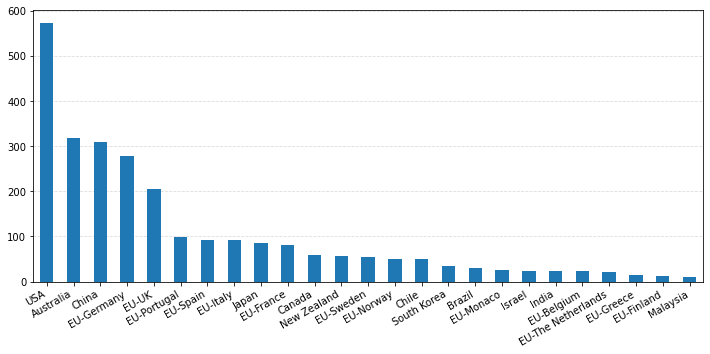

In [76]:
ax = b.plot.bar(zorder=3, figsize=[12,5], width=0.5, xlabel="")
ax.grid(axis='y', zorder=0, color='gainsboro', linestyle='--')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

In [77]:
df['Country']

0        EU-Austria
1               USA
2       EU-Portugal
3          Malaysia
4        EU-Germany
           ...     
2744     EU-Germany
2745       EU-Spain
2746            USA
2747     EU-Germany
2748     EU-Germany
Name: Country, Length: 2749, dtype: object

In [111]:
df['Country2'] = df['Country'].apply(lambda x: "EU" if str(x).startswith("EU-") else x)
a = df.groupby("Country2").size()
a.sort_values(inplace=True, ascending=False)
b = a[a > 10]
b

Country2
EU             1094
USA             573
Australia       317
China           308
Japan            85
Canada           59
New Zealand      56
Chile            49
South Korea      34
Brazil           29
Israel           24
India            23
Malaysia         11
dtype: int64

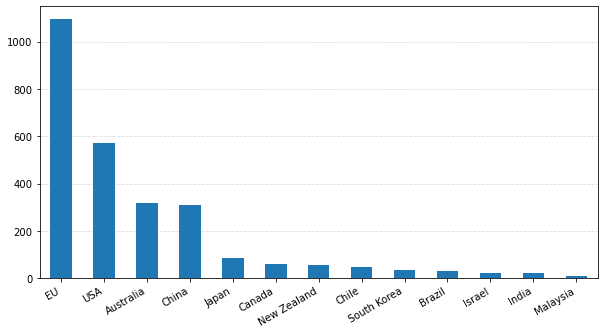

In [8]:
ax = b.plot.bar(zorder=3, figsize=[10,5], width=0.5, xlabel="")
ax.grid(axis='y', zorder=0, color='gainsboro', linestyle='--')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

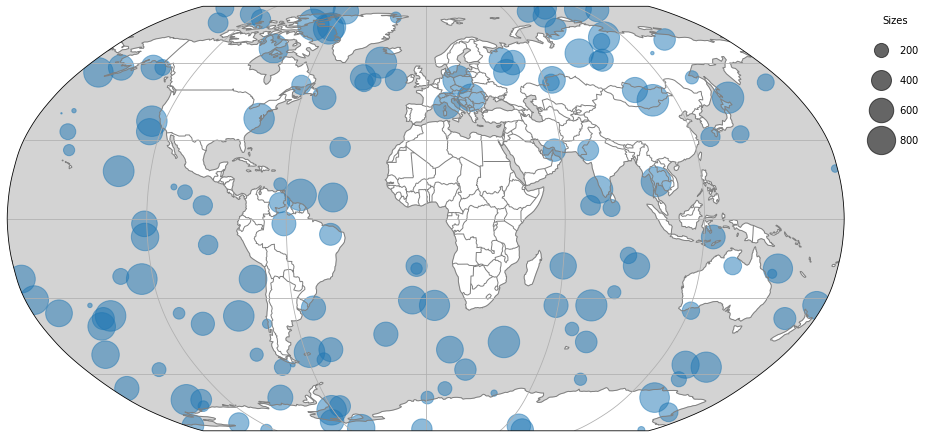

In [64]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import random

x = [random.randint(-180, 180) for p in range(0, 149)]
y = [random.randint(-90, 90) for p in range(0, 149)]
s = [random.randint(1, 1000) for p in range(0, 149)]

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.BORDERS, edgecolor="gray")
ax.add_feature(cfeature.OCEAN, color="lightgray")
ax.gridlines()

scatter = plt.scatter(x, y, s=s, transform=ccrs.PlateCarree(), alpha=0.5)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=5)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes", 
                    bbox_to_anchor=(1.1, 1), frameon=False, labelspacing=1.8)

plt.show()

In [141]:
df['Country3'] = df['Country'].apply(lambda x: x.split('-')[1] if str(x).startswith("EU-") else x)
a = df.groupby("Country3").size()
a.sort_values(inplace=True, ascending=False)
b = a[a > 1]
b

Country3
USA                        573
Australia                  317
China                      308
Germany                    278
UK                         207
Portugal                    99
Spain                       92
Italy                       91
Japan                       85
France                      82
Canada                      59
New Zealand                 56
Sweden                      55
Norway                      51
Chile                       49
South Korea                 34
Brazil                      29
Monaco                      25
Israel                      24
Belgium                     23
India                       23
The Netherlands             22
Greece                      15
Finland                     13
Malaysia                    11
China, Hong Kong            10
Denmark                      8
China, Taiwan                8
Mexico                       8
South Africa                 7
Turkey                       7
Argentina                    7

In [142]:
# https://towardsdatascience.com/things-to-do-with-latitude-longitude-data-using-geopy-python-1d356ed1ae30

from geopy.geocoders import Nominatim
geocoder = Nominatim(user_agent = 'your_app_name')

In [173]:
text = "UK" # (-3.2765753, 54.7023545)
text = "Bermuda" # (-64.7603583, 32.3018217)
text = "Hong Kong" # (114.1628131, 22.2793278)
text = "China"

lon = float(geocoder.geocode(text).raw['lon'])
lat = float(geocoder.geocode(text).raw['lat'])
lon, lat

(104.999927, 35.000074)

In [144]:
b.index

Index(['USA', 'Australia', 'China', 'Germany', 'UK', 'Portugal', 'Spain',
       'Italy', 'Japan', 'France', 'Canada', 'New Zealand', 'Sweden', 'Norway',
       'Chile', 'South Korea', 'Brazil', 'Monaco', 'Israel', 'Belgium',
       'India', 'The Netherlands', 'Greece', 'Finland', 'Malaysia',
       'China, Hong Kong', 'Denmark', 'China, Taiwan', 'Mexico',
       'South Africa', 'Turkey', 'Argentina', 'UK (Bermuda)', 'Poland',
       'Indonesia', 'Philippines', 'Estonia', 'Panama', 'Egypt',
       'Kingdom of Saudi Arabia', 'Brunei', 'Switzerland', 'Austria',
       'Thailand', 'Ireland', 'Kuwait', 'Namibia', 'Korea', 'New Caledonia'],
      dtype='object', name='Country3')

In [145]:
blon = b.index.map(lambda x: float(geocoder.geocode(x).raw['lon']))
blat = b.index.map(lambda x: float(geocoder.geocode(x).raw['lat']))

In [146]:
blat

Float64Index([       36.81843005,        -24.7761086,          35.000074,
                      51.0834196,         54.7023545,         40.0332629,
                      39.3260685,         42.6384261,         36.5748441,
                       46.603354,         61.0666922,        -41.5000831,
                      59.6749712,         60.5000209,        -31.7613365,
                       36.638392,        -10.3333333,        43.73844905,
                      31.5313113,         50.6402809,         22.3511148,
                     52.24764975,         38.9953683,         63.2467777,
                       4.5693754,         22.2793278,          55.670249,
                      26.0119097, 23.553556999999998,        -28.8166236,
                      38.9597594,        -34.9964963,         52.5056354,
                       52.215933,         -2.4833826,         12.7503486,
                     58.71971295,           8.559559,         26.2540493,
                      25.6242618,     

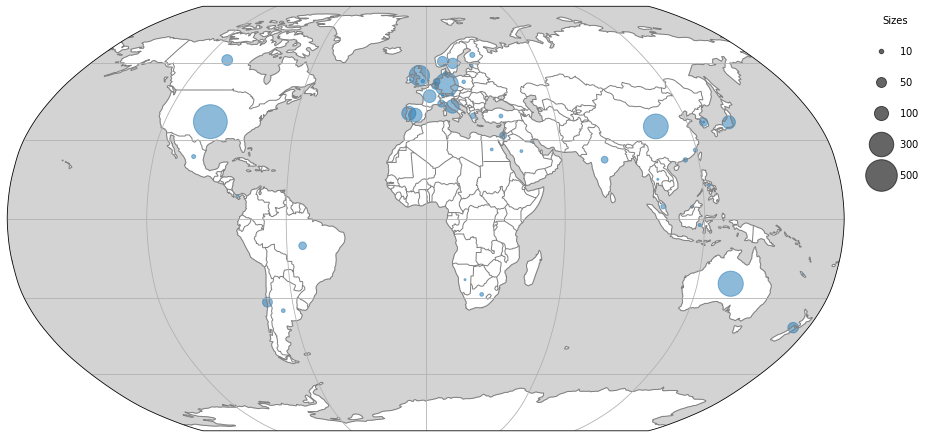

In [165]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.BORDERS, edgecolor="gray")
ax.add_feature(cfeature.OCEAN, color="lightgray")
ax.gridlines()

scaleFactor = 2
scatter = plt.scatter(blon, blat, b*scaleFactor, transform=ccrs.PlateCarree(), alpha=0.5, 
                   )

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=[10,50,100,300,500],
                                         func=lambda x: x/scaleFactor)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes", 
                    bbox_to_anchor=(1.1, 1), frameon=False, labelspacing=1.9)

plt.show()

In [148]:
scatter.legend_elements?

Signature:
scatter.legend_elements(
    prop='colors',
    num='auto',
    fmt=None,
    func=<function PathCollection.<lambda> at 0x7f3d7312c9d0>,
    **kwargs,
)
Docstring:
Create legend handles and labels for a PathCollection.

Each legend handle is a `.Line2D` representing the Path that was drawn,
and each label is a string what each Path represents.

This is useful for obtaining a legend for a `~.Axes.scatter` plot;
e.g.::

    scatter = plt.scatter([1, 2, 3],  [4, 5, 6],  c=[7, 2, 3])
    plt.legend(*scatter.legend_elements())

creates three legend elements, one for each color with the numerical
values passed to *c* as the labels.

Also see the :ref:`automatedlegendcreation` example.

Parameters
----------
prop : {"colors", "sizes"}, default: "colors"
    If "colors", the legend handles will show the different colors of
    the collection. If "sizes", the legend will show the different
    sizes. To set both, use *kwargs* to directly edit the `.Line2D`
    properties.
num : int, 

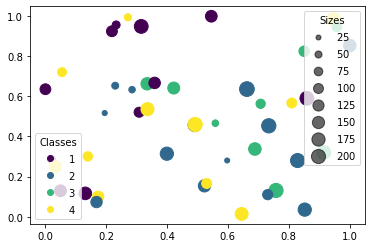

In [29]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html

N = 45
x, y = np.random.rand(2, N)
c = npa.random.randint(1, 5, size=N)
s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, s=s)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()